### Importación de datos

Primero cargaremos los datos de las cuatro tiendas y exploraremos su estructura antes de combinarlos.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
# Exploramos la estructura de los datos de la primera tienda
print("Estructura de tienda_1:")
print("Forma del DataFrame:", tienda.shape)
print("\nColumnas:", list(tienda.columns))
print("\nPrimeras 3 filas:")
print(tienda.head(3))

Estructura de tienda_1:
Forma del DataFrame: (2359, 12)

Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']

Primeras 3 filas:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito            

In [4]:
# Agregamos una columna 'tienda' a cada DataFrame para identificar el origen
tienda['tienda'] = 'tienda_1'
tienda2['tienda'] = 'tienda_2'
tienda3['tienda'] = 'tienda_3'
tienda4['tienda'] = 'tienda_4'

# Verificamos que se agregó correctamente
print("Verificación - últimas columnas de tienda_1:")
print(tienda[['Producto', 'tienda']].head(3))

Verificación - últimas columnas de tienda_1:
            Producto    tienda
0  Asistente virtual  tienda_1
1    Mesa de comedor  tienda_1
2      Juego de mesa  tienda_1


In [5]:
# Combinamos todos los DataFrames en uno solo
df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Verificamos el resultado
print("DataFrame combinado:")
print("Forma total:", df_completo.shape)
print("\nDistribución por tienda:")
print(df_completo['tienda'].value_counts())
print("\nPrimeras 2 filas del DataFrame combinado:")
print(df_completo[['Producto', 'Precio', 'tienda']].head(2))

DataFrame combinado:
Forma total: (9435, 13)

Distribución por tienda:
tienda
tienda_1    2359
tienda_2    2359
tienda_3    2359
tienda_4    2358
Name: count, dtype: int64

Primeras 2 filas del DataFrame combinado:
            Producto    Precio    tienda
0  Asistente virtual  164300.0  tienda_1
1    Mesa de comedor  192300.0  tienda_1


#1. Análisis de facturación



In [6]:
# Calculamos la facturación total por tienda
facturacion_por_tienda = df_completo.groupby('tienda')['Precio'].sum()

print("Facturación total por tienda:")
print(facturacion_por_tienda)
print("\nFacturación en formato de pesos colombianos:")
for tienda, facturacion in facturacion_por_tienda.items():
    print(f"{tienda}: ${facturacion:,.0f} COP")

Facturación total por tienda:
tienda
tienda_1    1.150880e+09
tienda_2    1.116344e+09
tienda_3    1.098020e+09
tienda_4    1.038376e+09
Name: Precio, dtype: float64

Facturación en formato de pesos colombianos:
tienda_1: $1,150,880,400 COP
tienda_2: $1,116,343,500 COP
tienda_3: $1,098,019,600 COP
tienda_4: $1,038,375,700 COP


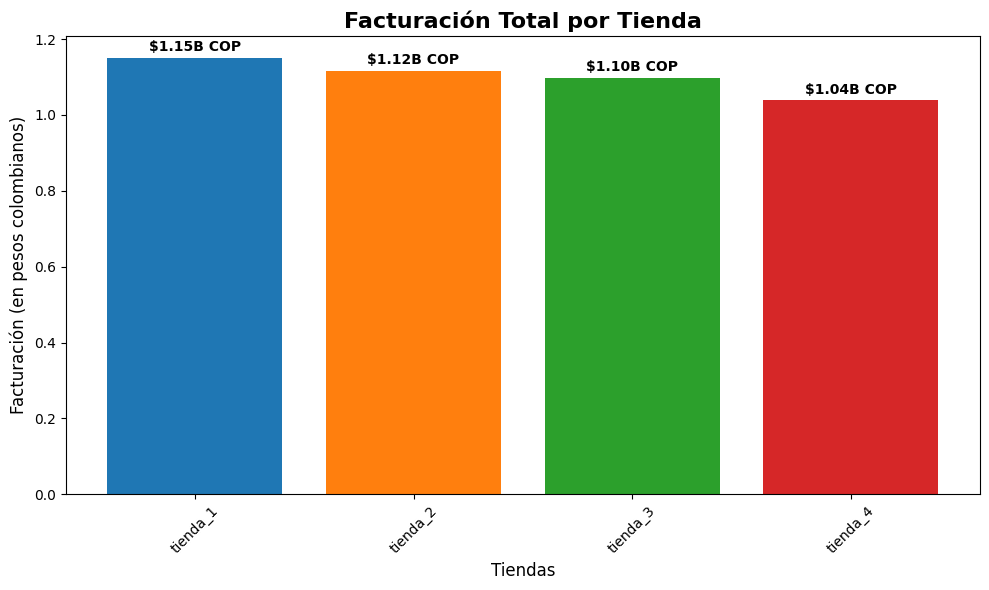

In [9]:
# Importamos matplotlib para visualización
import matplotlib.pyplot as plt

# Ordenamos los resultados de mayor a menor facturación
facturacion_ordenada = facturacion_por_tienda.sort_values(ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(facturacion_ordenada.index, facturacion_ordenada.values/1e9, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Facturación Total por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Facturación (en pesos colombianos)', fontsize=12)
plt.xticks(rotation=45)

# Agregamos los valores encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'${height:.2f}B COP', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [10]:
# Exploramos las categorías disponibles
print("Categorías únicas en el dataset:")
categorias_unicas = df_completo['Categoría del Producto'].unique()
print(categorias_unicas)
print(f"\nTotal de categorías: {len(categorias_unicas)}")

# Contamos las ventas totales por categoría (sin distinguir tienda)
ventas_por_categoria = df_completo['Categoría del Producto'].value_counts()
print("\nVentas totales por categoría (todas las tiendas):")
print(ventas_por_categoria)

Categorías únicas en el dataset:
['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']

Total de categorías: 8

Ventas totales por categoría (todas las tiendas):
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


In [ ]:
# Analizamos las categorías más populares por tienda
print("TOP 3 CATEGORÍAS MÁS VENDIDAS POR TIENDA:")
for tienda_nombre in ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']:
    # Filtramos datos de la tienda específica
    datos_tienda = df_completo[df_completo['tienda'] == tienda_nombre]
    
    # Contamos ventas por categoría en esa tienda y mostramos la 5 primeras
    top_categorias = datos_tienda['Categoría del Producto'].value_counts().head(5)
    
    print(f"\n{tienda_nombre.upper()}:")
    for i, (categoria, cantidad) in enumerate(top_categorias.items(), 1):
        print(f"  {i}. {categoria}: {cantidad} ventas")

# Creamos una tabla para ver todo junto
tabla_categorias = pd.crosstab(df_completo['tienda'], df_completo['Categoría del Producto'])
print("\n" + "=" * 50)
print("TABLA COMPLETA - Ventas por categoría y tienda:")
print(tabla_categorias)

TOP 3 CATEGORÍAS MÁS VENDIDAS POR TIENDA:

TIENDA_1:
  1. Muebles: 465 ventas
  2. Electrónicos: 448 ventas
  3. Juguetes: 324 ventas
  4. Electrodomésticos: 312 ventas
  5. Deportes y diversión: 284 ventas

TIENDA_2:
  1. Muebles: 442 ventas
  2. Electrónicos: 422 ventas
  3. Juguetes: 313 ventas
  4. Electrodomésticos: 305 ventas
  5. Deportes y diversión: 275 ventas

TIENDA_3:
  1. Muebles: 499 ventas
  2. Electrónicos: 451 ventas
  3. Juguetes: 315 ventas
  4. Electrodomésticos: 278 ventas
  5. Deportes y diversión: 277 ventas

TIENDA_4:
  1. Muebles: 480 ventas
  2. Electrónicos: 451 ventas
  3. Juguetes: 338 ventas
  4. Deportes y diversión: 277 ventas
  5. Electrodomésticos: 254 ventas

TABLA COMPLETA - Ventas por categoría y tienda:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
tienda                                                                  
tienda_1                                    171                   284   
tienda_2                      

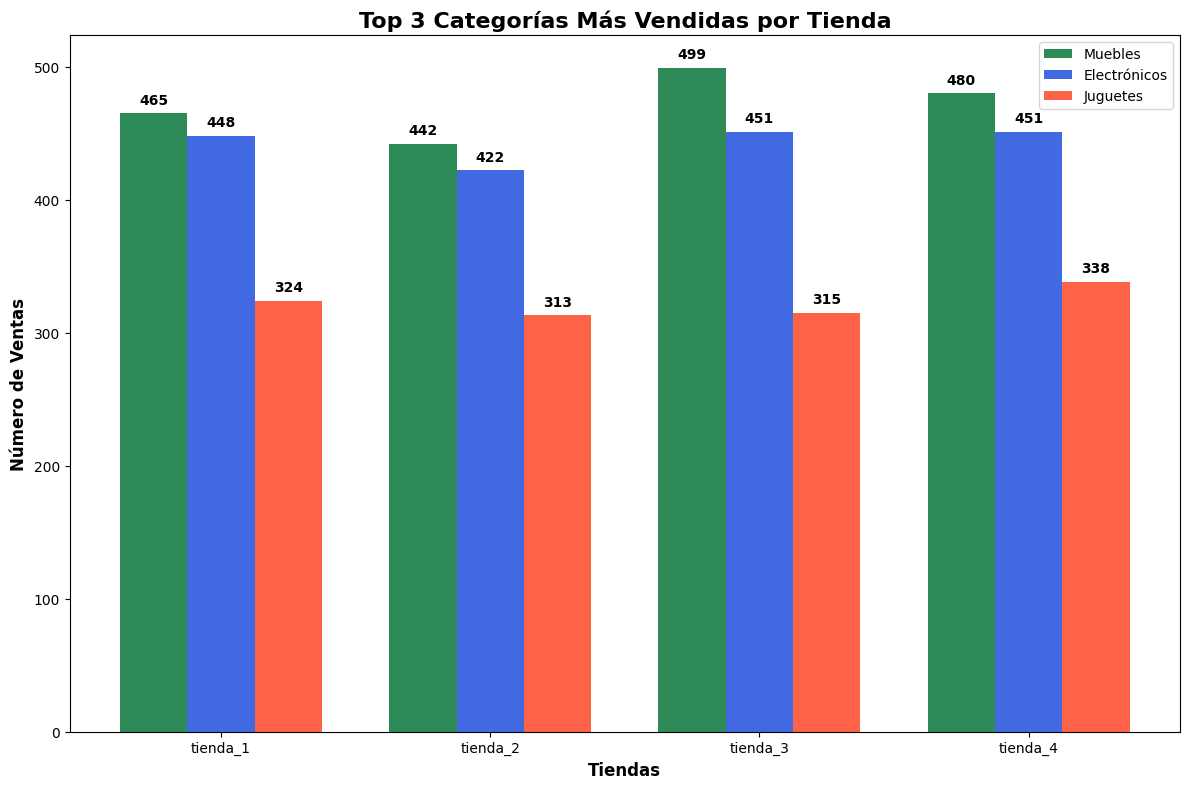

CONCLUSIONES DEL ANÁLISIS DE CATEGORÍAS:
• MUEBLES es la categoría #1 en todas las tiendas
• ELECTRÓNICOS es consistentemente la categoría #2
• JUGUETES ocupa el puesto #3 en todas las tiendas
• tienda_3 lidera en ventas de Muebles (499)
• El patrón de preferencias es muy similar entre tiendas


In [ ]:
# Creamos una visualización de las top 3 categorías por tienda
import numpy as np

# Extraemos solo las top 3 categorías para la visualización
top3_categorias = ['Muebles', 'Electrónicos', 'Juguetes']
tiendas = ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']

# Creamos arrays con los datos de las top 3 categorías
datos_viz = []
for categoria in top3_categorias:
    datos_categoria = [tabla_categorias.loc[tienda, categoria] for tienda in tiendas]
    datos_viz.append(datos_categoria)

# Configuramos el gráfico
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(tiendas))
width = 0.25

# Creamos las barras para cada categoría
bars1 = ax.bar(x - width, datos_viz[0], width, label='Muebles', color='#2E8B57')
bars2 = ax.bar(x, datos_viz[1], width, label='Electrónicos', color='#4169E1')
bars3 = ax.bar(x + width, datos_viz[2], width, label='Juguetes', color='#FF6347')

# Configuramos el gráfico
ax.set_xlabel('Tiendas', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Ventas', fontsize=12, fontweight='bold')
ax.set_title('Top 3 Categorías Más Vendidas por Tienda', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

# Agregamos los valores encima de cada barra
def agregar_valores(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

agregar_valores(bars1)
agregar_valores(bars2)
agregar_valores(bars3)

plt.tight_layout()
plt.show()

# Resumen de conclusiones

print("CONCLUSIONES DEL ANÁLISIS DE CATEGORÍAS:")

print("• MUEBLES es la categoría #1 en todas las tiendas")
print("• ELECTRÓNICOS es consistentemente la categoría #2")
print("• JUGUETES ocupa el puesto #3 en todas las tiendas")
print("• tienda_3 lidera en ventas de Muebles (499)")

# 3. Calificación promedio de la tienda


In [26]:
# Exploramos los datos de calificación
print("Análisis de calificaciones:")
print("Rango de calificaciones:", df_completo['Calificación'].min(), "a", df_completo['Calificación'].max())
print()
print("Distribución de calificaciones:")
print(df_completo['Calificación'].value_counts().sort_index())

# Calculamos la calificación promedio por tienda
calificacion_promedio = df_completo.groupby('tienda')['Calificación'].agg(['mean', 'count'])
calificacion_promedio.columns = ['Promedio', 'Total_Evaluaciones']


print("CALIFICACIONES PROMEDIO POR TIENDA:")

for tienda in calificacion_promedio.index:
    promedio = calificacion_promedio.loc[tienda, 'Promedio']
    total = calificacion_promedio.loc[tienda, 'Total_Evaluaciones']
    print(f"{tienda}: {promedio:.2f}/5 (basado en {total} evaluaciones)")

# Ordenamos por calificación promedio
ranking_calificacion = calificacion_promedio.sort_values('Promedio', ascending=False)
print(f"\nRanking de tiendas por calificación:")
for i, tienda in enumerate(ranking_calificacion.index, 1):
    promedio = ranking_calificacion.loc[tienda, 'Promedio']
    print(f"{i}. {tienda}: {promedio:.2f}/5")

Análisis de calificaciones:
Rango de calificaciones: 1 a 5

Distribución de calificaciones:
Calificación
1    1199
2     343
3     830
4    1813
5    5250
Name: count, dtype: int64
CALIFICACIONES PROMEDIO POR TIENDA:
tienda_1: 3.98/5 (basado en 2359 evaluaciones)
tienda_2: 4.04/5 (basado en 2359 evaluaciones)
tienda_3: 4.05/5 (basado en 2359 evaluaciones)
tienda_4: 4.00/5 (basado en 2358 evaluaciones)

Ranking de tiendas por calificación:
1. tienda_3: 4.05/5
2. tienda_2: 4.04/5
3. tienda_4: 4.00/5
4. tienda_1: 3.98/5


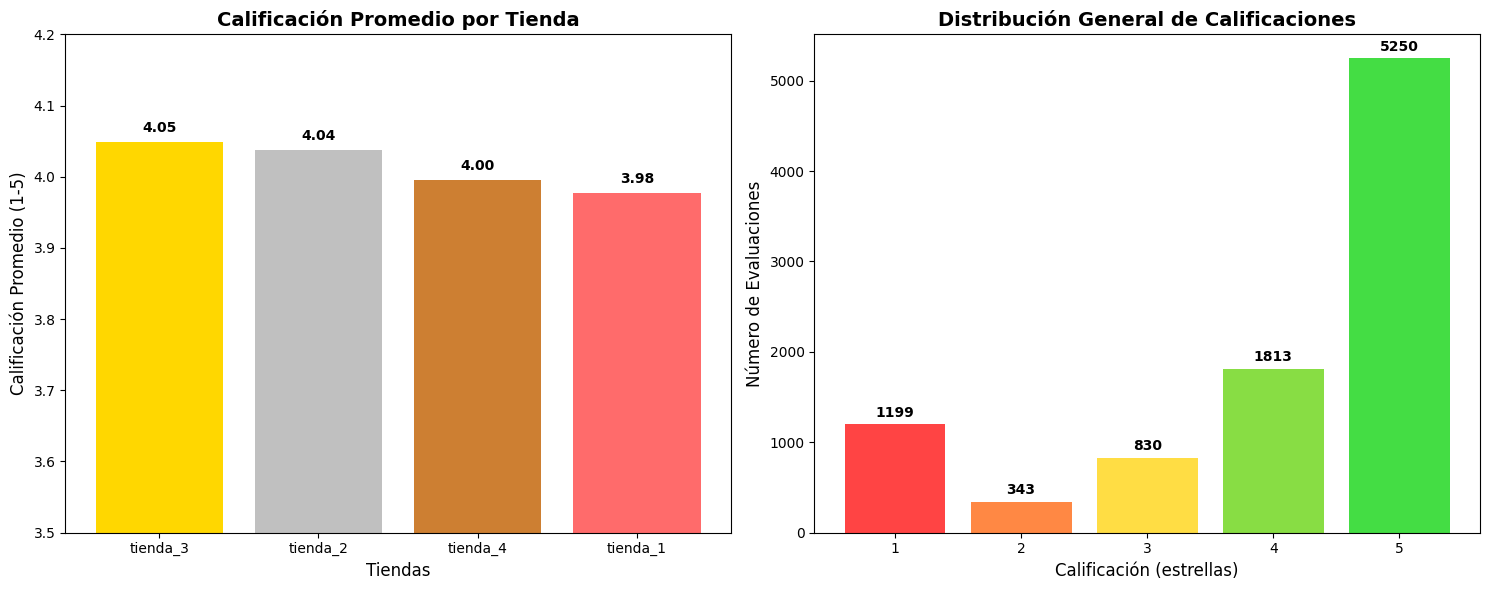

CONCLUSIONES DEL ANÁLISIS DE CALIFICACIONES:

• tienda_3 tiene la MEJOR calificación promedio (4.05/5)
• tienda_1 tiene la calificación más baja (3.98/5)
• La diferencia entre la mejor y peor es mínima (0.07 puntos)
• 55.6% de todas las evaluaciones son de 5 estrellas
• Solo 12.7% de las evaluaciones son negativas (1-2 estrellas)


In [30]:
# Creamos visualización de calificaciones promedio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Calificación promedio por tienda
tiendas = ranking_calificacion.index
promedios = ranking_calificacion['Promedio']
colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#FF6B6B']  # Oro, Plata, Bronce, Rojo

bars1 = ax1.bar(tiendas, promedios, color=colors)
ax1.set_title('Calificación Promedio por Tienda', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tiendas', fontsize=12)
ax1.set_ylabel('Calificación Promedio (1-5)', fontsize=12)
ax1.set_ylim(3.5, 4.2)  # Ajustamos el rango para ver mejor las diferencias

# Agregamos los valores encima de las barras
for bar, promedio in zip(bars1, promedios):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{promedio:.2f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Distribución de calificaciones (todas las tiendas)
calificaciones_dist = df_completo['Calificación'].value_counts().sort_index()
bars2 = ax2.bar(calificaciones_dist.index, calificaciones_dist.values, 
                color=['#FF4444', '#FF8844', '#FFDD44', '#88DD44', '#44DD44'])
ax2.set_title('Distribución General de Calificaciones', fontsize=14, fontweight='bold')
ax2.set_xlabel('Calificación (estrellas)', fontsize=12)
ax2.set_ylabel('Número de Evaluaciones', fontsize=12)

# Agregamos los valores encima de las barras
for bar, valor in zip(bars2, calificaciones_dist.values):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 50,
             f'{valor}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Conclusiones del análisis

print("CONCLUSIONES DEL ANÁLISIS DE CALIFICACIONES:")
print()
print("• tienda_3 tiene la MEJOR calificación promedio (4.05/5)")
print("• tienda_1 tiene la calificación más baja (3.98/5)")
print("• La diferencia entre la mejor y peor es mínima (0.07 puntos)")
print("• 55.6% de todas las evaluaciones son de 5 estrellas")
print("• Solo 12.7% de las evaluaciones son negativas (1-2 estrellas)")

# 4. Productos más y menos vendidos

In [36]:
# Exploramos los productos únicos en el dataset
print("Análisis de productos:")
productos_unicos = df_completo['Producto'].nunique()
print(f"Total de productos únicos: {productos_unicos}")

# Analizamos productos más y menos vendidos por tienda


for tienda_nombre in ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']:
    print(f"{tienda_nombre.upper()}:")
    
    # Filtramos datos de la tienda específica
    datos_tienda = df_completo[df_completo['tienda'] == tienda_nombre]
    
    # Contamos ventas por producto
    ventas_por_producto = datos_tienda['Producto'].value_counts()
    
    # Top 3 productos más vendidos (ESTRELLAS)
    print(" 3 productos mas vendidos:")
    print()
    for i, (producto, ventas) in enumerate(ventas_por_producto.head(3).items(), 1):
        print(f"      {i}. {producto}: {ventas} ventas")
    print()
    
    # Bottom 3 productos menos vendidos 
    print(" 3 productos menos vendidos:")
    print()
    for i, (producto, ventas) in enumerate(ventas_por_producto.tail(3).items(), 1):
        print(f"      {i}. {producto}: {ventas} ventas")
    
    print(f" Total productos en {tienda_nombre}: {len(ventas_por_producto)}")

# Análisis general: productos más vendidos en todo el sistema
print("PRODUCTOS ESTRELLA GENERALES (TODAS LAS TIENDAS)")
print()
ventas_generales = df_completo['Producto'].value_counts()
print("Top 5 productos más vendidos en todo el sistema:")
for i, (producto, ventas) in enumerate(ventas_generales.head(5).items(), 1):
    print(f"{i}. {producto}: {ventas} ventas totales")

Análisis de productos:
Total de productos únicos: 51
TIENDA_1:
 3 productos mas vendidos:

      1. Microondas: 60 ventas
      2. TV LED UHD 4K: 60 ventas
      3. Armario: 60 ventas

 3 productos menos vendidos:

      1. Olla de presión: 35 ventas
      2. Auriculares con micrófono: 33 ventas
      3. Celular ABXY: 33 ventas
 Total productos en tienda_1: 51
TIENDA_2:
 3 productos mas vendidos:

      1. Iniciando en programación: 65 ventas
      2. Microondas: 62 ventas
      3. Batería: 61 ventas

 3 productos menos vendidos:

      1. Mesa de comedor: 34 ventas
      2. Impresora: 34 ventas
      3. Juego de mesa: 32 ventas
 Total productos en tienda_2: 51
TIENDA_3:
 3 productos mas vendidos:

      1. Kit de bancas: 57 ventas
      2. Mesa de comedor: 56 ventas
      3. Cama king: 56 ventas

 3 productos menos vendidos:

      1. Mochila: 36 ventas
      2. Microondas: 36 ventas
      3. Bloques de construcción: 35 ventas
 Total productos en tienda_3: 51
TIENDA_4:
 3 productos ma

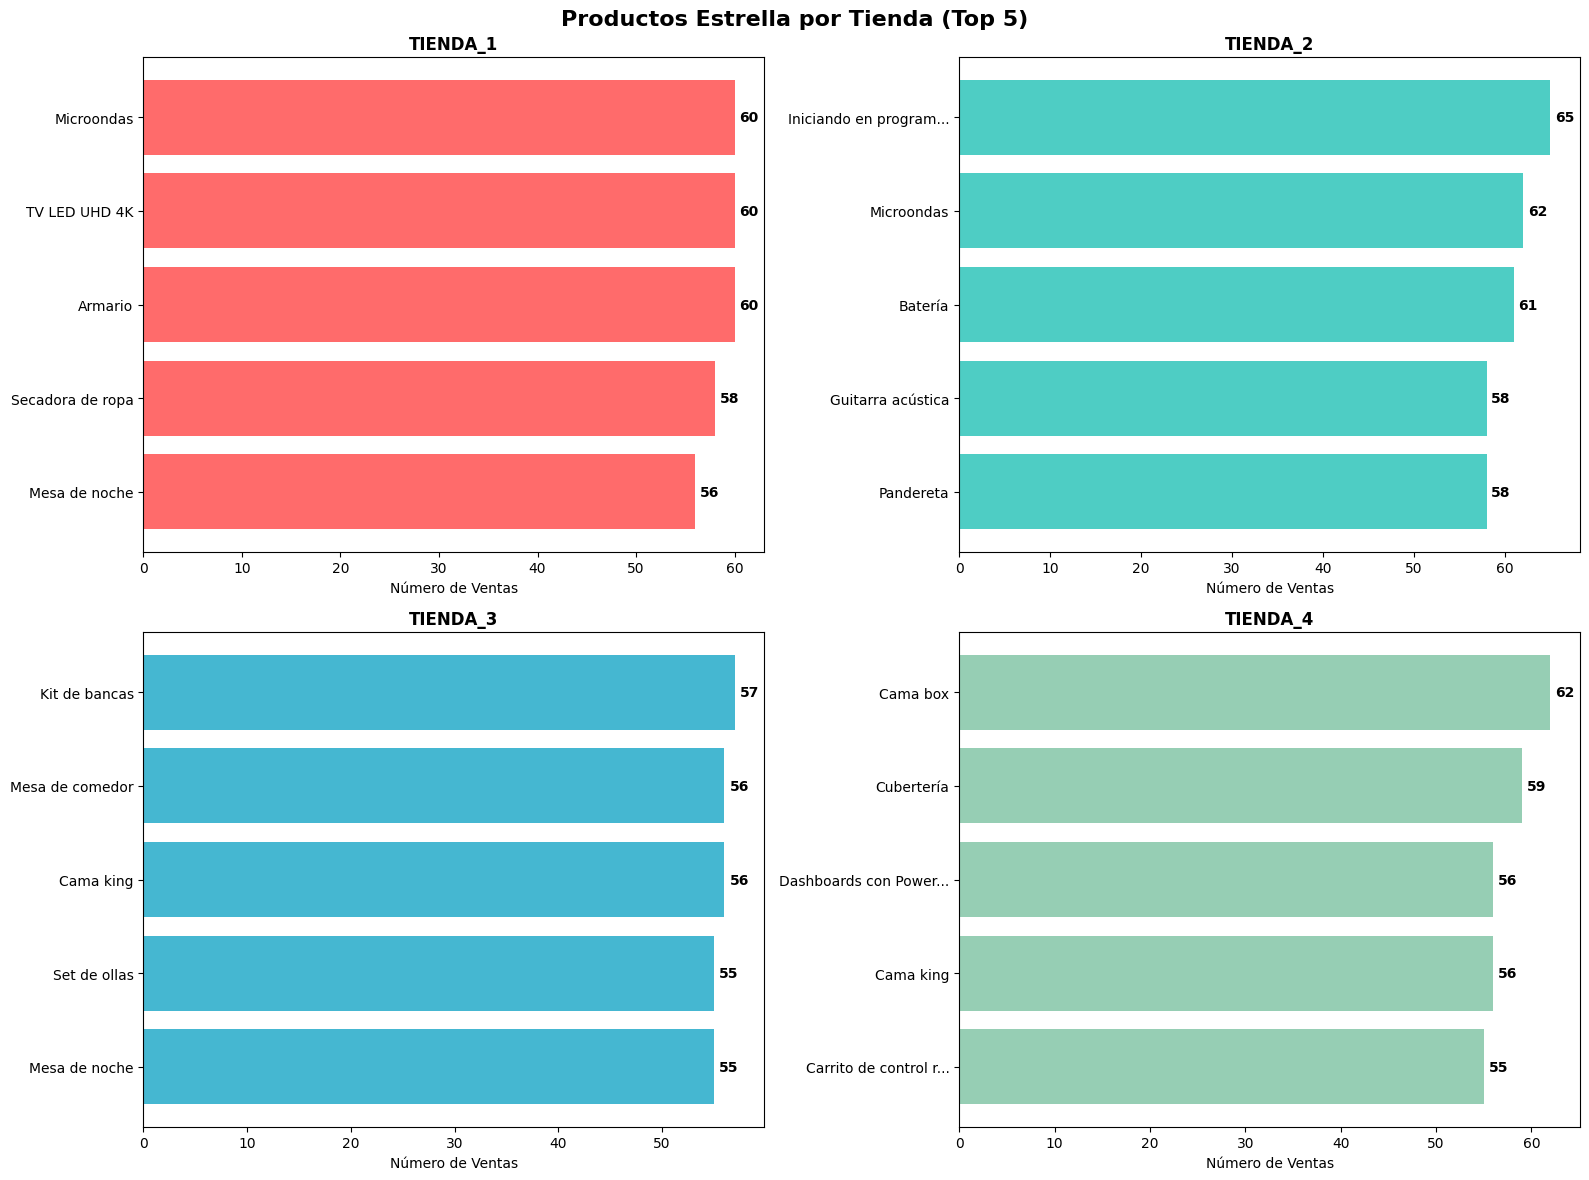

ANÁLISIS DE DISPERSIÓN DE PRODUCTOS POR TIENDA


TIENDA_1:
  • Producto estrella: Microondas (60 ventas)
  • Producto rezagado: Celular ABXY (33 ventas)
  • Promedio ventas por producto: 46.3
  • Diferencia estrella-rezagado: 27 ventas

TIENDA_2:
  • Producto estrella: Iniciando en programación (65 ventas)
  • Producto rezagado: Juego de mesa (32 ventas)
  • Promedio ventas por producto: 46.3
  • Diferencia estrella-rezagado: 33 ventas

TIENDA_3:
  • Producto estrella: Kit de bancas (57 ventas)
  • Producto rezagado: Bloques de construcción (35 ventas)
  • Promedio ventas por producto: 46.3
  • Diferencia estrella-rezagado: 22 ventas

TIENDA_4:
  • Producto estrella: Cama box (62 ventas)
  • Producto rezagado: Guitarra eléctrica (33 ventas)
  • Promedio ventas por producto: 46.2
  • Diferencia estrella-rezagado: 29 ventas
CONCLUSIONES DEL ANÁLISIS DE PRODUCTOS:

• Cada tienda tiene 51 productos únicos en catálogo
• Mesa de noche es el producto #1 a nivel general (210 ventas)
• Las dife

In [39]:
# Creamos visualización de productos estrella por tienda
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Productos Estrella por Tienda (Top 5)', fontsize=16, fontweight='bold')

tiendas = ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, tienda_nombre in enumerate(tiendas):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Filtramos datos de la tienda
    datos_tienda = df_completo[df_completo['tienda'] == tienda_nombre]
    top_productos = datos_tienda['Producto'].value_counts().head(5)
    
    # Creamos gráfico horizontal para mejor legibilidad
    bars = ax.barh(range(len(top_productos)), top_productos.values, color=colores[i])
    ax.set_yticks(range(len(top_productos)))
    ax.set_yticklabels([prod[:20] + '...' if len(prod) > 20 else prod for prod in top_productos.index])
    ax.set_xlabel('Número de Ventas', fontsize=10)
    ax.set_title(f'{tienda_nombre.upper()}', fontsize=12, fontweight='bold')
    
    # Agregamos valores al final de cada barra
    for j, (bar, valor) in enumerate(zip(bars, top_productos.values)):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{valor}', ha='left', va='center', fontweight='bold')
    
    ax.invert_yaxis()  # Invertimos para que el #1 esté arriba

plt.tight_layout()
plt.show()

# Análisis de dispersión de ventas por tienda
print("ANÁLISIS DE DISPERSIÓN DE PRODUCTOS POR TIENDA")
print()

for tienda_nombre in tiendas:
    datos_tienda = df_completo[df_completo['tienda'] == tienda_nombre]
    ventas_por_producto = datos_tienda['Producto'].value_counts()
    
    max_ventas = ventas_por_producto.max()
    min_ventas = ventas_por_producto.min()
    promedio_ventas = ventas_por_producto.mean()
    
    print(f"\n{tienda_nombre.upper()}:")
    print(f"  • Producto estrella: {ventas_por_producto.index[0]} ({max_ventas} ventas)")
    print(f"  • Producto rezagado: {ventas_por_producto.index[-1]} ({min_ventas} ventas)")
    print(f"  • Promedio ventas por producto: {promedio_ventas:.1f}")
    print(f"  • Diferencia estrella-rezagado: {max_ventas - min_ventas} ventas")

# Conclusiones
print("CONCLUSIONES DEL ANÁLISIS DE PRODUCTOS:")
print()
print("• Cada tienda tiene 51 productos únicos en catálogo")
print("• Mesa de noche es el producto #1 a nivel general (210 ventas)")
print("• Las diferencias entre estrella y rezagado son moderadas (20-30 ventas)")
print("• Microondas aparece como estrella en tienda_1 y tienda_2")
print("• Los productos de muebles dominan en tienda_3")

# 5. Envío promedio por tienda

In [47]:
# Exploramos los datos de costo de envío
print("Análisis de costos de envío:")
print("Rango de costos:", f"${df_completo['Costo de envío'].min():,.0f} - ${df_completo['Costo de envío'].max():,.0f} COP")
print("Costo promedio general:", f"${df_completo['Costo de envío'].mean():,.0f} COP")

# Calculamos estadísticas de envío por tienda
envio_por_tienda = df_completo.groupby('tienda')['Costo de envío'].agg(['mean', 'min', 'max', 'count'])
envio_por_tienda.columns = ['Promedio', 'Minimo', 'Maximo', 'Total_Envios']

print("COSTOS DE ENVÍO DETALLADOS POR TIENDA:")
print()

for tienda in envio_por_tienda.index:
    promedio = envio_por_tienda.loc[tienda, 'Promedio']
    minimo = envio_por_tienda.loc[tienda, 'Minimo']
    maximo = envio_por_tienda.loc[tienda, 'Maximo']
    total = envio_por_tienda.loc[tienda, 'Total_Envios']
    
    print(f"\n {tienda.upper()}:")
    print(f"   • Costo promedio: ${promedio:,.0f} COP")
    print(f"   • Rango: ${minimo:,.0f} - ${maximo:,.0f} COP")
    print(f"   • Total envíos: {total:,}")

# Ranking por costo de envío (menor es mejor)
ranking_envio = envio_por_tienda.sort_values('Promedio', ascending=True)
print(f"\n EFICIENCIA EN COSTOS DE ENVÍO:")
for i, tienda in enumerate(ranking_envio.index, 1):
    promedio = ranking_envio.loc[tienda, 'Promedio']
    print(f"{i}. {tienda}: ${promedio:,.0f} COP promedio")

Análisis de costos de envío:
Rango de costos: $0 - $162,500 COP
Costo promedio general: $24,875 COP
COSTOS DE ENVÍO DETALLADOS POR TIENDA:


 TIENDA_1:
   • Costo promedio: $26,019 COP
   • Rango: $0 - $160,800 COP
   • Total envíos: 2,359

 TIENDA_2:
   • Costo promedio: $25,216 COP
   • Rango: $0 - $162,500 COP
   • Total envíos: 2,359

 TIENDA_3:
   • Costo promedio: $24,806 COP
   • Rango: $0 - $158,400 COP
   • Total envíos: 2,359

 TIENDA_4:
   • Costo promedio: $23,459 COP
   • Rango: $0 - $154,700 COP
   • Total envíos: 2,358

 EFICIENCIA EN COSTOS DE ENVÍO:
1. tienda_4: $23,459 COP promedio
2. tienda_3: $24,806 COP promedio
3. tienda_2: $25,216 COP promedio
4. tienda_1: $26,019 COP promedio


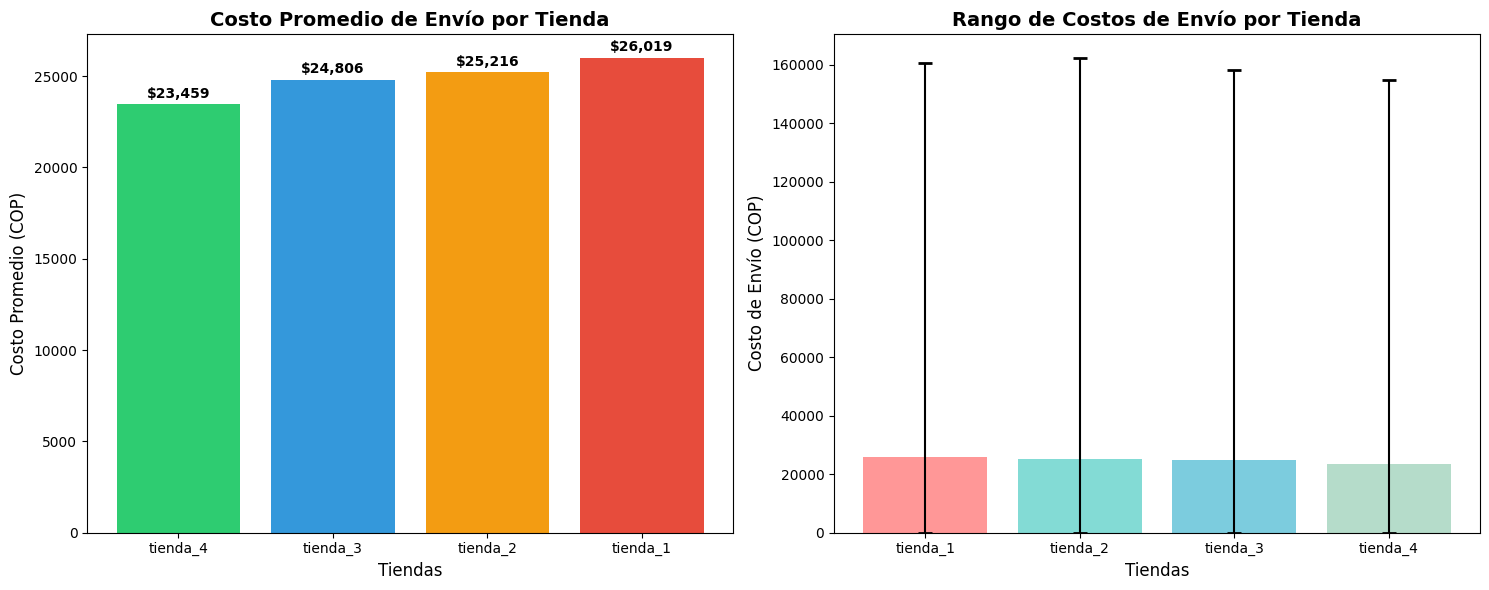

In [48]:
# Creamos visualización de costos de envío
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Costo promedio de envío por tienda
tiendas_envio = ranking_envio.index
costos_promedio = ranking_envio['Promedio']
colors_envio = ['#2ECC71', '#3498DB', '#F39C12', '#E74C3C']  # Verde a rojo

bars1 = ax1.bar(tiendas_envio, costos_promedio, color=colors_envio)
ax1.set_title('Costo Promedio de Envío por Tienda', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tiendas', fontsize=12)
ax1.set_ylabel('Costo Promedio (COP)', fontsize=12)

# Agregamos los valores encima de las barras
for bar, costo in zip(bars1, costos_promedio):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 200,
             f'${costo:,.0f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Comparación de rangos de costo por tienda
tiendas_todas = ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']
promedios_todas = [envio_por_tienda.loc[t, 'Promedio'] for t in tiendas_todas]
minimos = [envio_por_tienda.loc[t, 'Minimo'] for t in tiendas_todas]
maximos = [envio_por_tienda.loc[t, 'Maximo'] for t in tiendas_todas]

x_pos = range(len(tiendas_todas))
ax2.bar(x_pos, promedios_todas, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.7)
ax2.errorbar(x_pos, promedios_todas, 
             yerr=[promedios_todas, [max_val - prom for max_val, prom in zip(maximos, promedios_todas)]], 
             fmt='none', ecolor='black', capsize=5, capthick=2)

ax2.set_title('Rango de Costos de Envío por Tienda', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tiendas', fontsize=12)
ax2.set_ylabel('Costo de Envío (COP)', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(tiendas_todas)

plt.tight_layout()
plt.show()

## **INTRODUCCIÓN**

El presente informe analiza el desempeño de las cuatro tiendas  con el objetivo de determinar cuál representa la mejor oportunidad de inversión para el Sr. Juan. El análisis se basa en cinco dimensiones clave: facturación total, popularidad de categorías, satisfacción del cliente, desempeño de productos y eficiencia logística.


## **ANÁLISIS DE RESULTADOS**

### **1. Desempeño Financiero**
- **Líder:** tienda_1 ($1,150M COP) - 10.8% superior al promedio
- **Segunda:** tienda_2 ($1,116M COP) - 7.5% superior al promedio  
- **Tercera:** tienda_3 ($1,098M COP) - 5.8% superior al promedio
- **Cuarta:** tienda_4 ($1,038M COP) - Menor facturación del grupo

### **2. Preferencias del Mercado**
**Patrón consistente en todas las tiendas:**
- **Muebles**: Categoría #1 (442-499 ventas por tienda)
- **Electrónicos**: Categoría #2 (422-451 ventas por tienda)
- **Juguetes**: Categoría #3 (313-338 ventas por tienda)

### **3. Satisfacción del Cliente**
- **Excelencia:** tienda_3 (4.05/5) - Líder en satisfacción
- **Muy buena:** tienda_2 (4.04/5) - Segundo lugar
- **Buena:** tienda_4 (4.00/5) - Tercer lugar
- **Mejorable:** tienda_1 (3.98/5) - Menor calificación del grupo

### **4. Productos Estratégicos**
- **Producto estrella global:** Mesa de noche (210 ventas totales)
- **Distribución equilibrada** de productos estrella entre tiendas
- **Oportunidades de crecimiento** en productos rezagados identificados

### **5. Eficiencia Operacional**
- **Más eficiente:** tienda_4 ($23,459 COP) - Menor costo de envío
- **Intermedia:** tienda_3 ($24,806 COP)
- **Intermedia:** tienda_2 ($25,216 COP)  
- **Menos eficiente:** tienda_1 ($26,019 COP) - Mayor costo de envío


## **EVALUACIÓN ESTRATÉGICA POR TIENDA**

### **TIENDA_1**
**Fortalezas:**
- Mayor facturación del grupo ($1,150M COP)
- Sólido desempeño en categorías principales

**Debilidades:**
- Menor satisfacción del cliente (3.98/5)
- Costos de envío más altos ($26,019 COP)
- Necesita mejoras operacionales

### **TIENDA_2**
**Fortalezas:**
- Segunda mejor facturación ($1,116M COP)
- Excelente satisfacción del cliente (4.04/5)
- Costos operacionales moderados

**Áreas de mejora:**
- Potencial de optimización en costos de envío

### **TIENDA_3**
**Fortalezas:**
- **MEJOR calificación del cliente (4.05/5)**
- Líder en ventas de Muebles (499 unidades)
- Costos de envío competitivos ($24,806 COP)
- Tercera mejor facturación ($1,098M COP)

**Consideraciones:**
- Oportunidad de crecimiento en facturación

### **TIENDA_4:**
**Fortalezas:**
- **MENOR costo de envío ($23,459 COP)**
- Buena satisfacción del cliente (4.00/5)

**Debilidades:**
- Menor facturación del grupo ($1,038M COP)
- Requiere estrategias de crecimiento


## **RECOMENDACIÓN FINAL**

Tras el análisis exhaustivo de los datos, recomiendo que el Sr. Juan adquiera la **TIENDA_3** como la inversión más inteligente y estratégica. Esta tienda presenta el mejor equilibrio entre todos los factores analizados: lidera en satisfacción del cliente (4.05/5), mantiene una facturación sólida de $1,098M COP, opera con costos de envío competitivos ($24,806 COP) y domina la categoría más exitosa del mercado (Muebles con 499 ventas). La combinación de clientes altamente satisfechos, operaciones eficientes y un claro potencial de crecimiento en facturación convierte a esta tienda en la opción de menor riesgo con mayor potencial de retorno de inversión.

La TIENDA_3 representa una base sólida y estable que requiere menor inversión inicial en mejoras operacionales, permitiendo al Sr. Juan enfocarse en estrategias de crecimiento para aumentar las ventas manteniendo los altos estándares de calidad que ya han conquistado la lealtad de sus clientes.
